Linear models for regression
y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
Here, x[0] to x[p] denotes the features of a single data point, w and b are parameters of the model that are learned, and y is the prediction the model makes. For a dataset with a single feature, this looks like:
y = w[0] * x[0] + b
w[0] is the slope and b is the y-intercept

w[0]: 0.393906  b: -0.031804


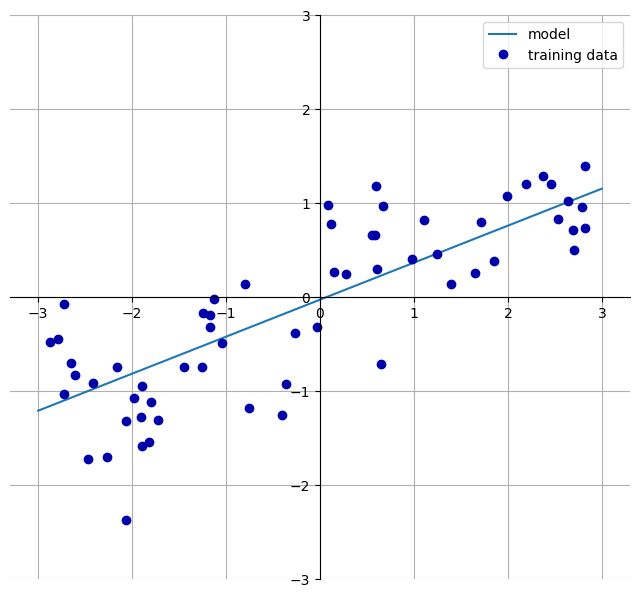

In [2]:
# we want to see the parameters w[0] and b on our one-dimensional wave dataset 
import mglearn
mglearn.plots.plot_linear_regression_wave()

Ordinary Least Squares
This is the simplest and most classic linear method for regression. It finds the parameters w and b that minimizet he mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is teh sum of teh squared differences between teh predictions and the true values. Linear regression has no parameters, which is a beneift, but it also has no way to control model complexity. Below is the code to form the above graph:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# the slope parameter w, also called the weights or coefficients, are stored in the coef_ attribute
# while the offset or intercept (b) is stored in the intercept_ attribute

# the intercept_ attribute is always a float, while the coef_ is a NumPy array with one entry per feature
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

# let's print the scores for the model
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Testing set score: {:.2f}'.format(lr.score(X_test,y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Testing set score: 0.66


Linear models for classification
The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisiticRegression, and linear support vector machines, implemented in svm.LinearSVC. We can apply the LogisticRegression and LinearSVC models to the forge dataset, and visualize the decision boundary as found by the linear models.

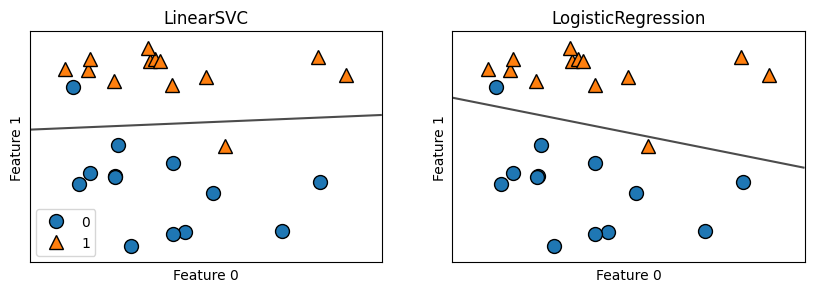

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()